In [5]:
!pip install lightgbm 


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 563.7 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.5 MB 525.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 504.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 502.3 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.5 MB 484.3 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.5 MB 484.3 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.5 MB 491.5 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.5 MB 429.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.5 MB 459.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.5 MB 412.6 kB/s eta 0:00:03
   ------ ---

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor


In [9]:
df = pd.read_csv('C:/Users/DELL-7420/Downloads/concrete_data.csv')  # Replace with your path if needed
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


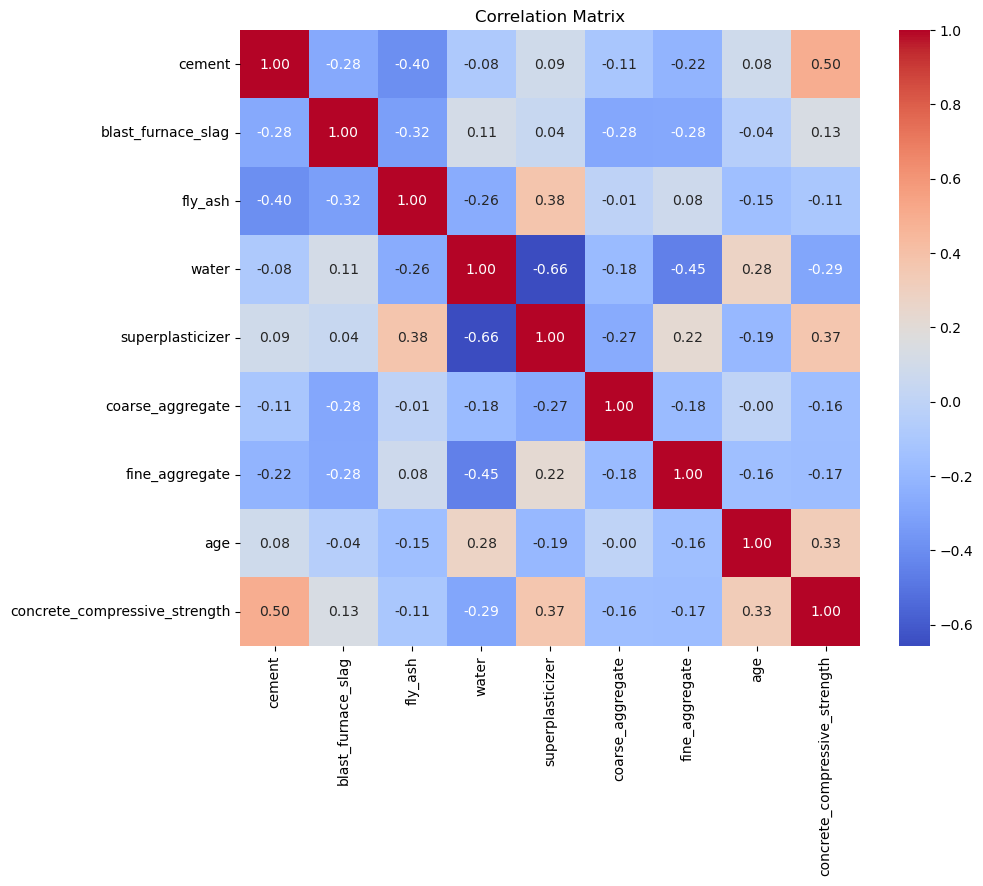

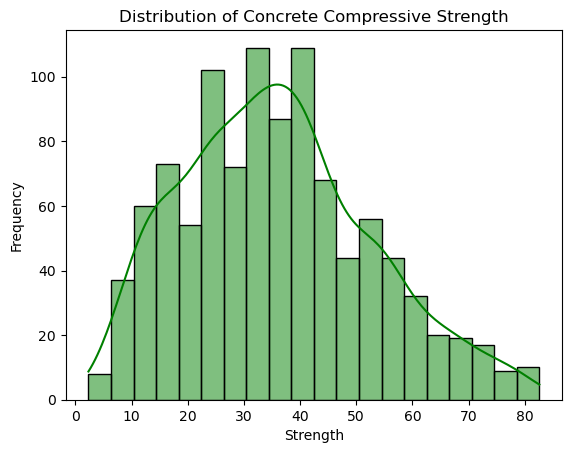

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

sns.histplot(df["concrete_compressive_strength"], bins=20, kde=True, color='green')
plt.title("Distribution of Concrete Compressive Strength")
plt.xlabel("Strength")
plt.ylabel("Frequency")
plt.show()


In [15]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

train_X = train.drop(columns=["concrete_compressive_strength", "age_months"], errors='ignore')
train_Y = train["concrete_compressive_strength"]
test_X = test.drop(columns=["concrete_compressive_strength", "age_months"], errors='ignore')
test_Y = test["concrete_compressive_strength"]


In [17]:
def evaluate_model(name, model, test_X, test_Y):
    preds = model.predict(test_X)
    r2 = r2_score(test_Y, preds)
    mse = mean_squared_error(test_Y, preds)
    rmse = np.sqrt(mse)
    print(f"{name} Performance:")
    print("R² Score:", round(r2, 4))
    print("MSE:", round(mse, 4))
    print("RMSE:", round(rmse, 4))
    print("-" * 40)
    return name, r2, mse, rmse


In [19]:
results = []

# CatBoost
cat = CatBoostRegressor(verbose=0, random_seed=42)
cat.fit(train_X, train_Y)
results.append(evaluate_model("CatBoost", cat, test_X, test_Y))

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(train_X, train_Y)
results.append(evaluate_model("XGBoost", xgb, test_X, test_Y))

# LightGBM
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(train_X, train_Y)
results.append(evaluate_model("LightGBM", lgbm, test_X, test_Y))

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(train_X, train_Y)
results.append(evaluate_model("Random Forest", rf, test_X, test_Y))


CatBoost Performance:
R² Score: 0.9337
MSE: 17.9329
RMSE: 4.2347
----------------------------------------
XGBoost Performance:
R² Score: 0.9104
MSE: 24.2314
RMSE: 4.9225
----------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 721, number of used features: 8
[LightGBM] [Info] Start training from score 36.152732
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

           Model  R² Score        MSE      RMSE
0       CatBoost  0.933723  17.932933  4.234729
1        XGBoost  0.910444  24.231439  4.922544
2       LightGBM  0.922934  20.852011  4.566400
3  Random Forest  0.889626  29.864286  5.464823


C:\Users\DELL-7420\AppData\Local\Temp\ipykernel_24408\423425426.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=results_df, palette="viridis")


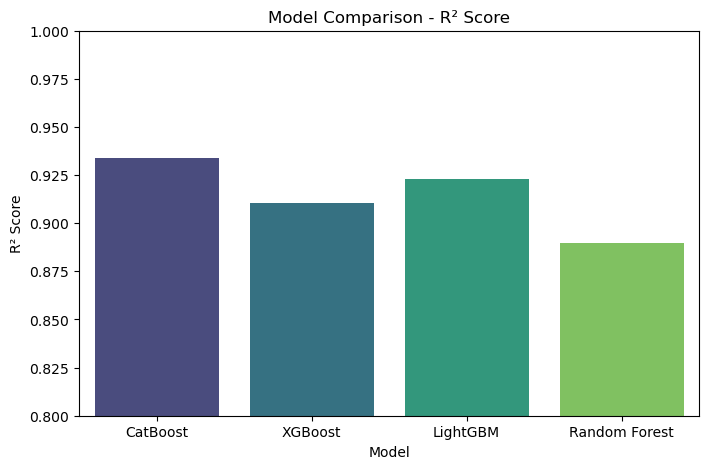

C:\Users\DELL-7420\AppData\Local\Temp\ipykernel_24408\423425426.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="magma")


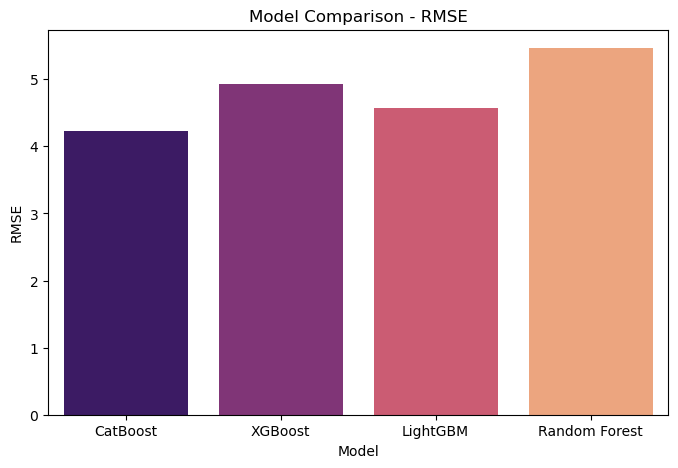

In [21]:
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MSE", "RMSE"])
print(results_df)

# Plot R² Score
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R² Score", data=results_df, palette="viridis")
plt.title("Model Comparison - R² Score")
plt.ylim(0.8, 1.0)
plt.show()

# Plot RMSE
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="magma")
plt.title("Model Comparison - RMSE")
plt.show()
